<a href="https://colab.research.google.com/github/klinhle2306/Education-Inequality/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This project addresses inequality of educational opportunity in U.S. high schools. This projetc focuses on average student performance on the ACT or SAT exams that students take as part of the college application process.

The hypothesis is to expects a range of school performance on these exams, but is school performance predicted by socioeconomic factors?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Subset selection
from itertools import combinations
from math import comb

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

  a. EdGap: data: All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey. [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release.

  b. School Information Data: The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. This data set can be access [here](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0).

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Education-Inequality/main/clean_training_edGap.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/klinhle2306/Education-Inequality/main/clean_testing_edGap.csv')

In [3]:
df

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,region,average_act
0,0.096353,0.366770,0.659110,31009.0,0.644991,SE,19.200000
1,0.146809,0.624745,0.845479,64810.0,0.229216,NW,21.495726
2,0.053538,0.591367,0.854953,62621.0,0.123832,NE,21.324786
3,0.088304,0.544531,0.528000,40568.0,0.211094,LK,20.700000
4,0.039375,0.806250,0.957165,80429.0,0.197175,SE,22.800000
...,...,...,...,...,...,...,...
5776,0.088907,0.559269,0.807556,42529.0,0.433164,SE,20.201465
5777,0.072515,0.339232,0.473849,39464.0,0.425532,LK,18.100000
5778,0.155347,0.577521,0.365327,35323.0,0.317700,SE,25.061050
5779,0.112046,0.569123,0.621442,50998.0,0.373802,SE,19.224664


## Problem Statement

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors.

- What are the relationship between other attributes and average ACT scores?
- What is the strongest factor that determine the ACT scores?


## Analysis

###The correlation matrix to explore relationships between the variables.

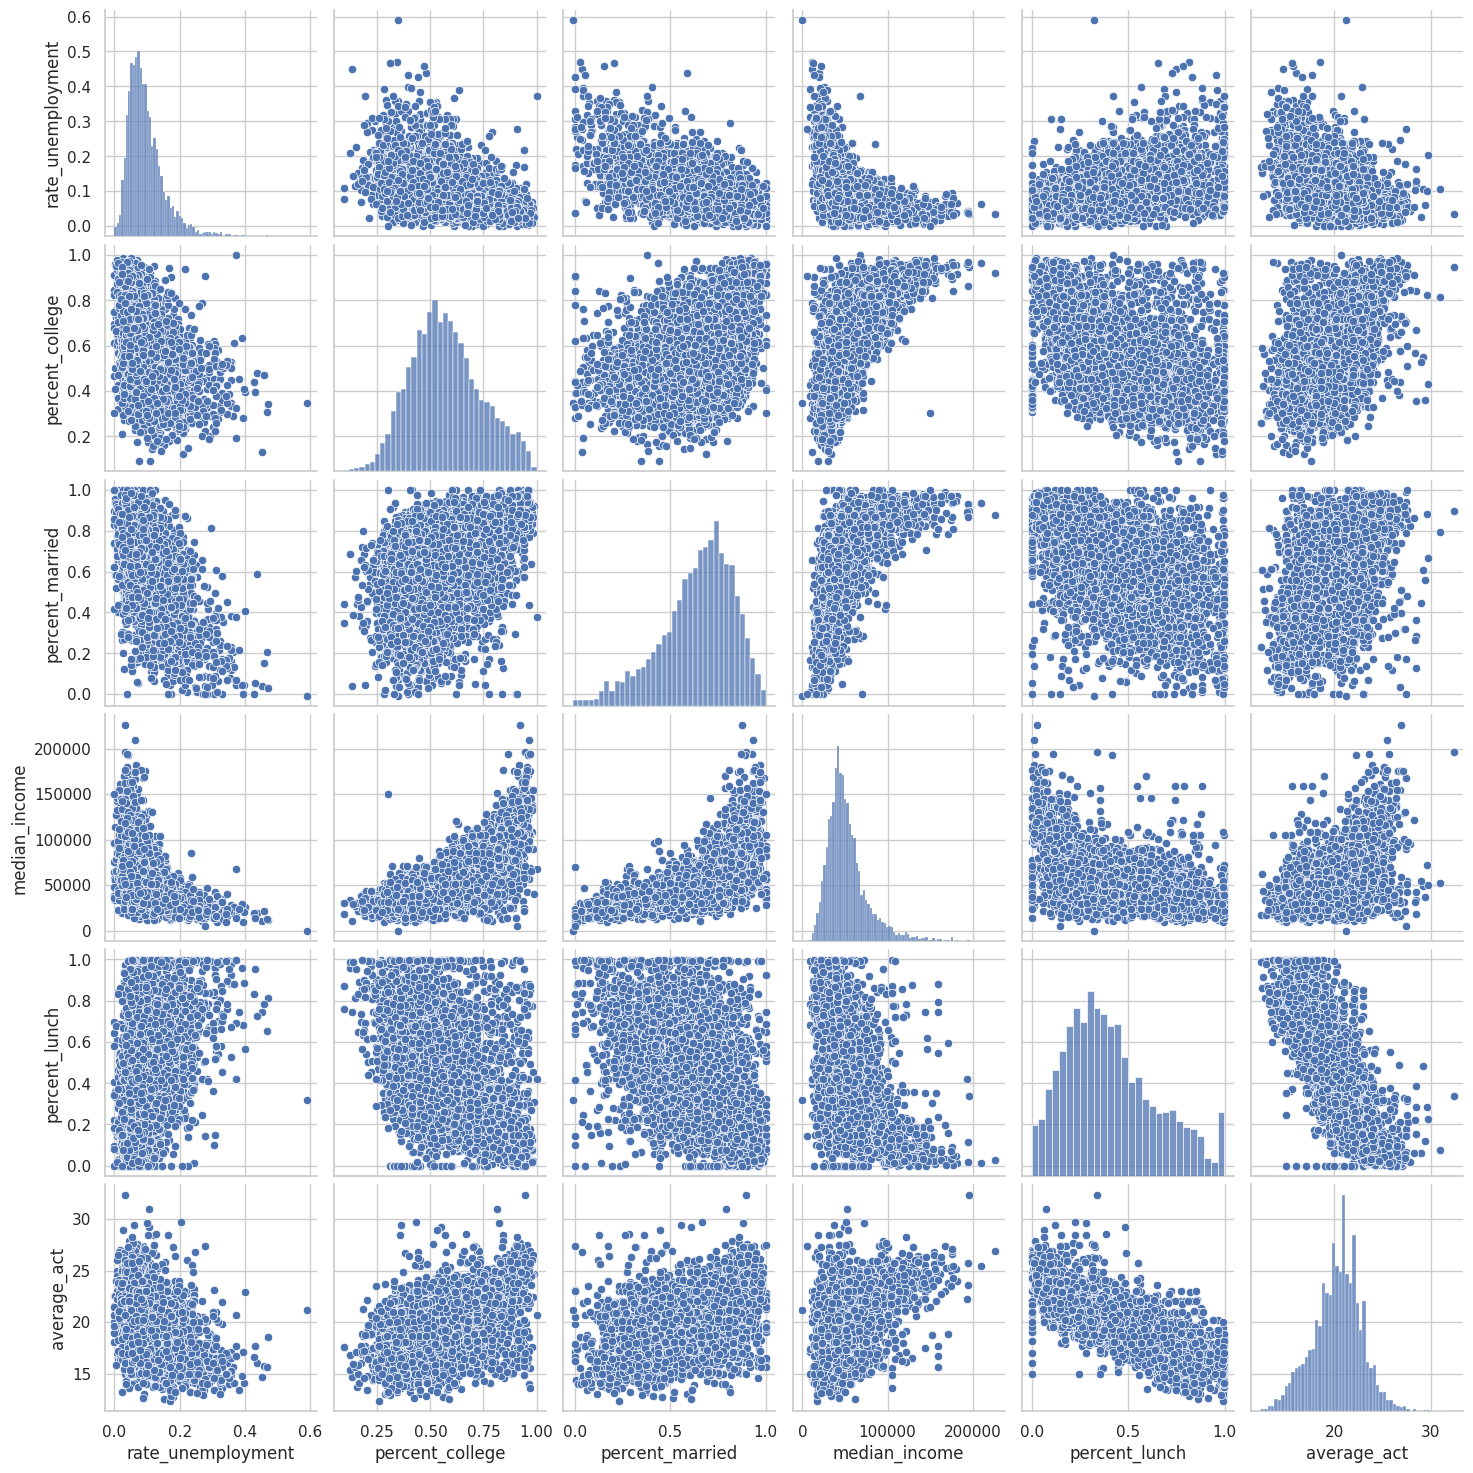

In [4]:
sns.pairplot(data = df.loc[:,['rate_unemployment', 'percent_college',	'percent_married',	'median_income',	'percent_lunch', 'average_act']])

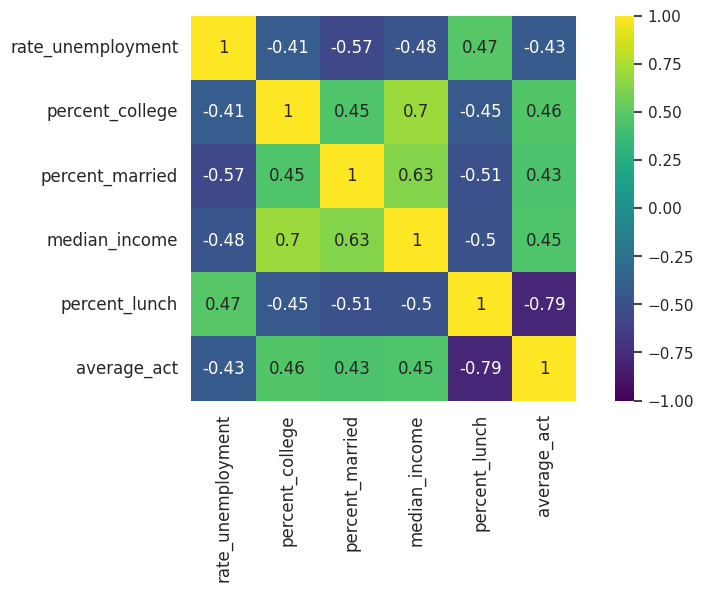

In [5]:
corr_matrix = df.loc[:,['rate_unemployment', 'percent_college',	'percent_married',	'median_income',	'percent_lunch', 'average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

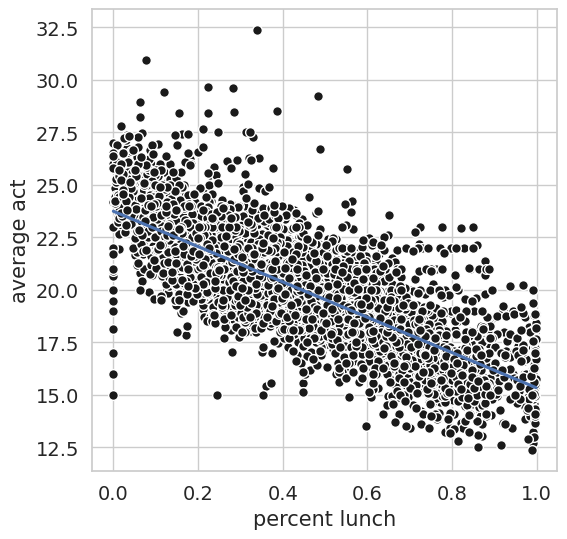

In [6]:
plt.figure(figsize=(6,6))

# Scatter plot 
plt.plot(df['percent_lunch'], df['average_act'], 'ko', mec ='w', ms=7)

# Add the regression line
sns.regplot(data=df, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)

# Add axis labels
plt.xlabel('percent lunch', fontsize=15)
plt.ylabel('average act', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

In [7]:
model = smf.ols(formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data=df).fit()

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2006.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10616.
No. Observations:                5781   AIC:                         2.124e+04
Df Residuals:                    5775   BIC:                         2.128e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7859      0.15

In [9]:
model_1 = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

In [10]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     9416.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10731.
No. Observations:                5781   AIC:                         2.147e+04
Df Residuals:                    5779   BIC:                         2.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7441      0.041    579.007

% married and median income are not significant in the full model

r squared is relatively large (.63)

suggesting that rate_unemployment, percent_college, percent_lunch is good for fitting the model

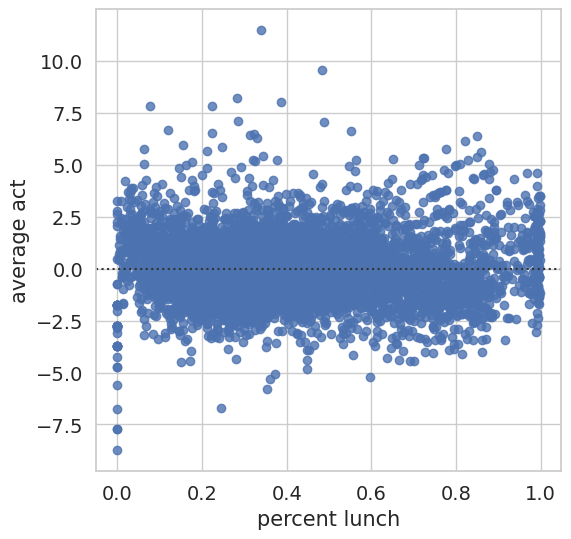

In [11]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=df, x = 'percent_lunch', y = 'average_act')

# Add axis labels
plt.ylabel('average act', fontsize=15)
plt.xlabel('percent lunch', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

##Best Subset Selection##

In [12]:
x = df[df.columns.difference(['average_act', 'region'])]
y = df['average_act']

In [13]:
variable_names = x.columns.values
variable_names

array(['median_income', 'percent_college', 'percent_lunch',
       'percent_married', 'rate_unemployment'], dtype=object)

In [14]:
best_aic = np.zeros(len(variable_names))
best_bic = np.zeros(len(variable_names))
best_adj_r_2 = np.zeros(len(variable_names))
best_predictors = list()

for i in range(len(variable_names)):
  subset = combinations(variable_names, i)
  for n, names in enumerate(subset):
    predictors = x.loc[:,names]
    model = sm.OLS(y, sm.add_constant(predictors)).fit()
    if (n == 0) or (model.rsquared_adj > this_best_adj_r_2):
      this_best_adj_r_2 = model.rsquared_adj
      this_best_aic = model.aic
      this_best_bic = model.bic
      this_best_predictor = names

  best_bic[i] = this_best_bic
  best_aic[i] = this_best_aic
  best_adj_r_2[i] = this_best_adj_r_2
  best_predictors.append(this_best_predictor)

(best_adj_r_2, best_aic, best_bic)

(array([2.22044605e-16, 6.19621634e-01, 6.32532660e-01, 6.34236725e-01,
        6.34361795e-01]),
 array([27053.39144195, 21466.54120039, 21267.91120731, 21242.03988198,
        21241.06198374]),
 array([27060.05377391, 21479.8658643 , 21287.89820318, 21268.68920981,
        21274.37364353]))

In [15]:
best_predictors

[(),
 ('percent_lunch',),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch', 'rate_unemployment'),
 ('percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment')]

In [16]:
model_1 = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     9416.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10731.
No. Observations:                5781   AIC:                         2.147e+04
Df Residuals:                    5779   BIC:                         2.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7441      0.041    579.007

In [17]:
model_2 = smf.ols(formula='average_act ~ percent_college + percent_lunch', data=df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4976.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10631.
No. Observations:                5781   AIC:                         2.127e+04
Df Residuals:                    5778   BIC:                         2.129e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.3719      0.104    2

In [18]:
model_3 = smf.ols(formula='average_act ~ percent_college + percent_lunch + rate_unemployment', data=df).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3342.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10617.
No. Observations:                5781   AIC:                         2.124e+04
Df Residuals:                    5777   BIC:                         2.127e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6147      0.11

In [19]:
model_4 = smf.ols(formula='average_act ~ percent_college + percent_lunch + percent_married + rate_unemployment', data=df).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2508.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:16   Log-Likelihood:                -10616.
No. Observations:                5781   AIC:                         2.124e+04
Df Residuals:                    5776   BIC:                         2.127e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7867      0.15

## Regression with Categorical Predictors

In [20]:
df['region'].value_counts()

LK    2363
SE    1139
NE    1135
S      909
NW     205
N       30
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

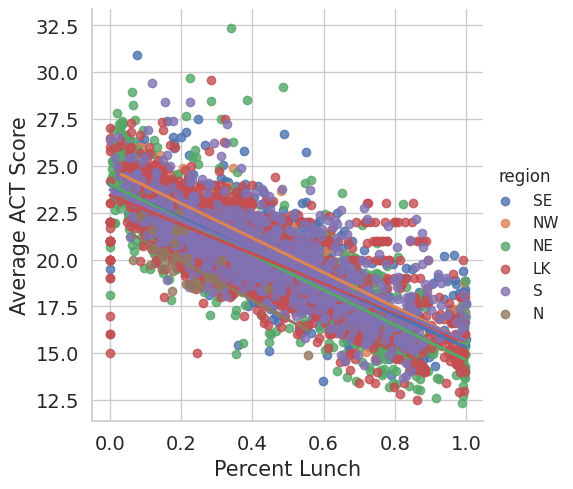

In [21]:
plt.figure(figsize=(6,6))

# Add the regression lines
sns.lmplot(data=df, x = 'percent_lunch', y = 'average_act', hue = 'region', ci=None)

# Add axis labels
plt.xlabel('Percent Lunch', fontsize=15)
plt.ylabel('Average ACT Score', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

In [22]:
model_reg = smf.ols(formula='average_act ~ percent_lunch + C(region)', data=df).fit()
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:17   Log-Likelihood:                -10660.
No. Observations:                5781   AIC:                         2.133e+04
Df Residuals:                    5774   BIC:                         2.138e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.6902      0.045    5

In [23]:
model_reg_2 = smf.ols(formula='average_act ~ percent_lunch * C(region)', data=df).fit()
print(model_reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     904.2
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        09:14:17   Log-Likelihood:                -10629.
No. Observations:                5781   AIC:                         2.128e+04
Df Residuals:                    5769   BIC:                         2.136e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [24]:
y_predict = model_1.predict(df_test)
mean_squared_error(y_predict, df_test['average_act'])

2.5519972504415156

In [25]:
y_predict_1 = model_reg_2.predict(df_test)
mean_squared_error(y_predict_1, df_test['average_act'])

2.4897092307744564

## Conclusion

- Percent Lunch and other variables are more significant at predicting the average ACT score.
- The added attribute 'region' is not a strong deciding factor to determine ACT scores. 